# Analisis Spesies Bunga Iris dengan Metode K-Means Clustering
### Tujuan
Tujuan analisis ini adalah:

- Mengelompokkan data bunga Iris ke dalam beberapa kelompok berdasarkan kemiripan fitur morfologinya menggunakan algoritma K-Means.
### Variabel dalam Dataset
1. `sepal_length:` Panjang kelopak bunga (dalam cm).
2. `sepal_width:` Lebar kelopak bunga (dalam cm).
3. `petal_length:` Panjang mahkota bunga (dalam cm).
4. `petal_width:` Lebar mahkota bunga (dalam cm).
5. `species:` Spesies bunga, yang merupakan variabel target (kategorikal) dengan nilai:
    - setosa
    - versicolor
    - virginica

## Import Library

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Data preparation

### A. Memuat Data
Langkah pertama, kita harus muat dulu data dari file CSV. Data ini akan kita olah nanti supaya bisa dipakai buat analisis atau model.

In [2]:
data = pd.read_csv("/Users/mac/Downloads/Iris.csv")

### B. Menampilkan Beberapa Baris Data
Setelah data dimuat, mari kita lihat beberapa baris pertama untuk memahami struktur dan isi data. Ini akan membantu kita memvalidasi apakah dataset sudah dimuat dengan benar.

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### C. Data Cleaning
1. Cek apakah ada data kosong dan siapkan data untuk analisis.

In [4]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


Ternyata Setelah dicek tidak ada data yang kosong / missing value

2. Menghapus kolom yang menurut kami tidak relevan

In [5]:
# Menghapus kolom 'id'
data = data.drop('Id', axis=1)
print(data)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


3. Mengecek apakah ada data yang terduplikasi.

In [6]:
# Check for duplicates
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
print('')

# Menampilkan semua baris yang terduplikasi (termasuk yang pertama)
all_duplicate_rows = data[data.duplicated(keep='first')]
print(all_duplicate_rows)

Number of duplicate rows: 3

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
34             4.9           3.1            1.5           0.1     Iris-setosa
37             4.9           3.1            1.5           0.1     Iris-setosa
142            5.8           2.7            5.1           1.9  Iris-virginica


Memang ada data yang ganda / duplikat namun menurut saya tidak perlu dihilangkan karena mungkin bisa jadi ini adalah data yang sah

## 2. EDA

### A. Memahami Struktur Data
Sebelum melakukan analisis lebih lanjut, kita perlu melihat struktur dasar dari data.

In [7]:
print(data.info())
print('')
print(data.describe())
print('')
print(data.head())
print('')
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.9000

### B. Mengeksplorasi Distribusi Data
Memeriksa distribusi setiap fitur penting untuk mengetahui apakah data terdistribusi dengan normal

<Figure size 1200x800 with 0 Axes>

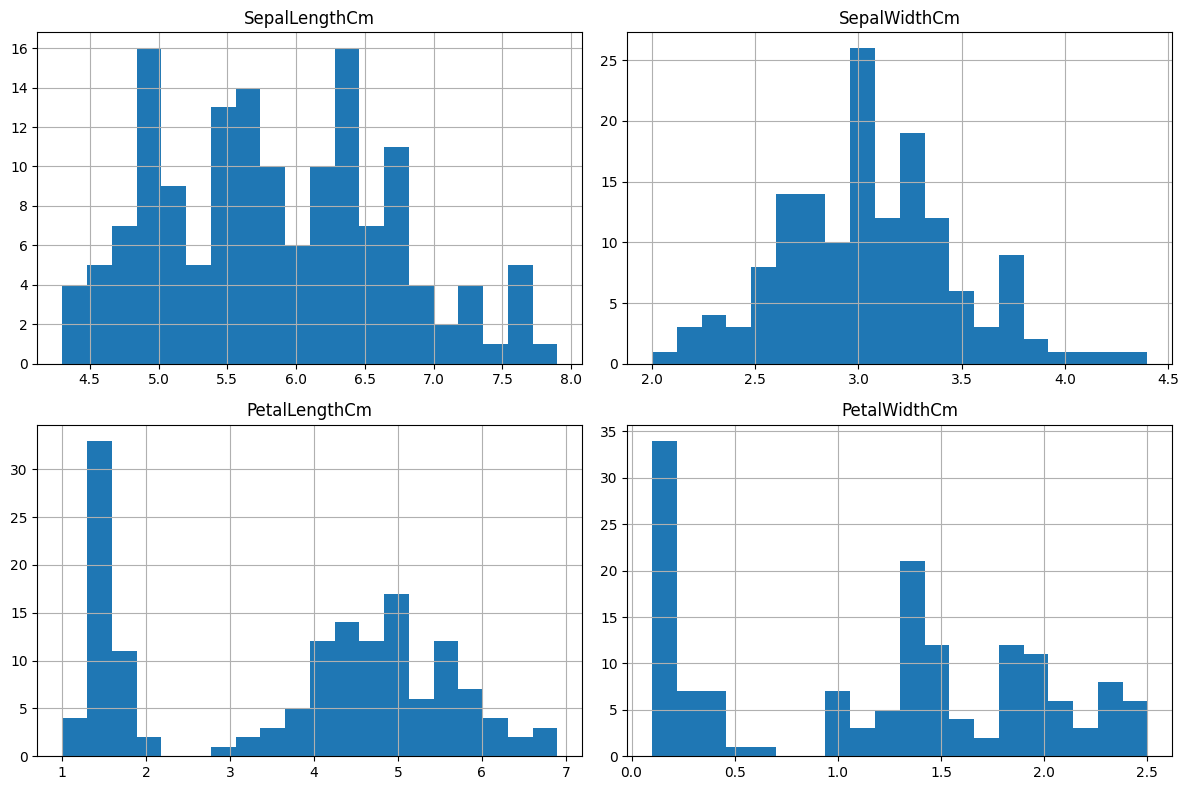

In [8]:
# Visualisasi distribusi setiap fitur menggunakan histogram
plt.figure(figsize=(12, 8))
data.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

### C. Deteksi Outlier Menggunakan BoxPlot

<Axes: >

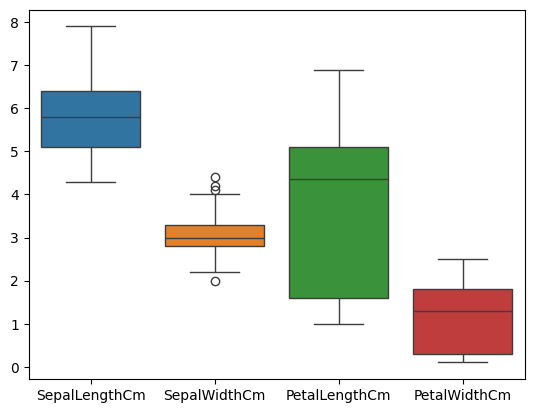

In [9]:
sns.boxplot(data)

Ternyata Ada Outlier Pada Kolom SepalWidthCm

### Mengatasi Outlier Dengan Membuat Fungsi: `impute_outliers_with_mean`

Fungsi ini digunakan untuk mendeteksi outlier pada suatu kolom numerik berdasarkan metode Interquartile Range (IQR). Jika ditemukan nilai yang berada di luar batas bawah dan batas atas (outlier), nilai tersebut akan diganti dengan rata-rata (mean) dari kolom tersebut.

In [10]:
# Fungsi untuk mengganti outlier dengan mean
def impute_outliers_with_mean(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Menentukan batas bawah dan batas atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menghitung rata-rata kolom
    mean_value = data[column].mean()
    
    # Mengganti outlier dengan mean
    data[column] = data[column].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)
    
    return data

# Mengganti outlier dengan mean pada setiap kolom numerik
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data = impute_outliers_with_mean(data, column)

# Menampilkan data setelah imputasi
print(data.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


#### Outlier yang ada di kolom SepalWidthCm sudah hilang / bersih

<Axes: >

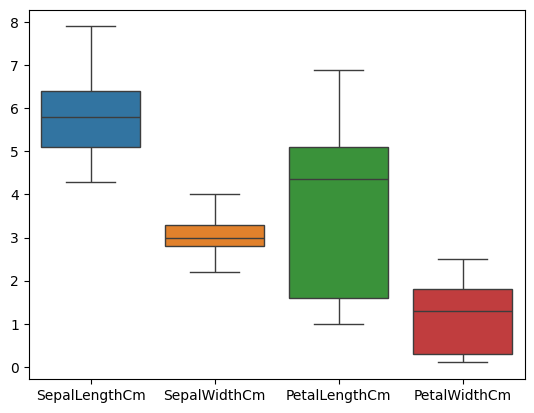

In [11]:
sns.boxplot(data)

### D. Memeriksa Korelasi Antar Fitur
Mempelajari hubungan antara fitur numerik dapat memberi wawasan tentang kolinearitas dan apakah ada fitur yang sangat saling berhubungan.

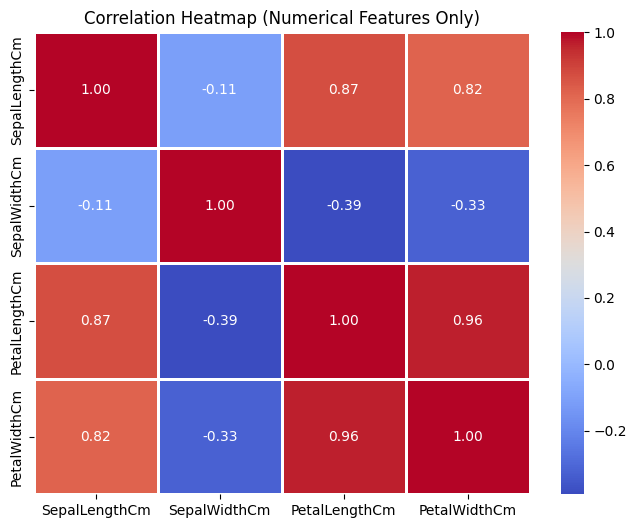

In [ ]:
# Pilih hanya kolom numerik
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi antar fitur
correlation_matrix = numeric_data.corr()

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

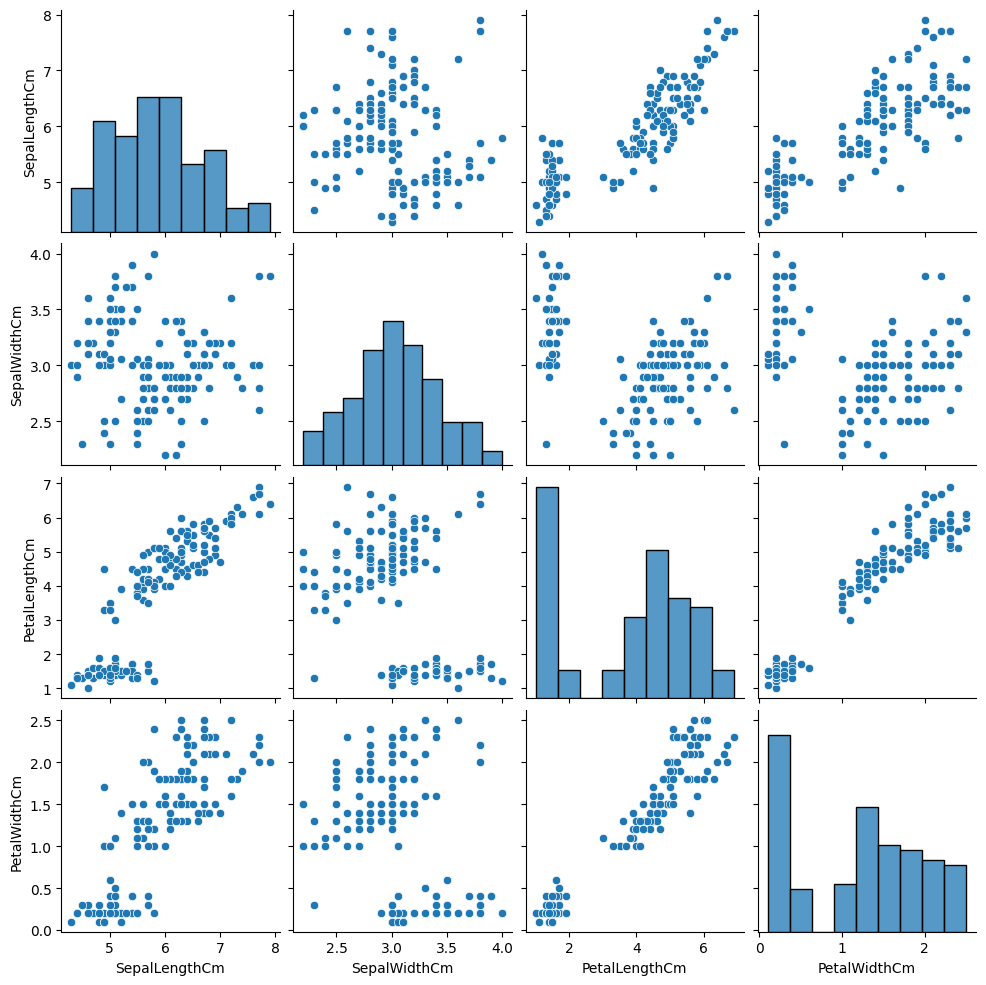

In [13]:
sns.pairplot(data)

In [14]:
# # Pilih kolom numerik
# numerical_cols = data.select_dtypes(include=['float64', 'int64'])

# # Lakukan normalisasi hanya pada kolom numerik
# normalized_data = (numerical_cols - numerical_cols.min()) / (numerical_cols.max() - numerical_cols.min())

# # Gabungkan kembali dengan kolom non-numerik
# data = pd.concat([normalized_data, data.select_dtypes(exclude=['float64', 'int64'])], axis=1)


In [15]:
# data

### Memilih Variabel X

In [16]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

## 3. Modeling

### A. Menghitung Jarak Euclidean

In [17]:
# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

### B. Implementasi Algoritma K-Means untuk Klasterisasi

Fungsi k_means adalah implementasi algoritma K-Means yang bertujuan untuk membagi data menjadi 
𝑘
k cluster berdasarkan jarak Euclidean. Algoritma ini bekerja secara iteratif dengan mengelompokkan data ke centroid terdekat dan memperbarui posisi centroid hingga mencapai konvergensi atau batas iterasi yang ditentukan.

In [18]:
# Implementasi K-Means
def k_means(X, k, max_iter=1000, tol=1e-4):
    np.random.seed(42)  # Untuk hasil yang dapat direproduksi
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]  # Inisialisasi centroid
    
    for iteration in range(max_iter):
        # Assignment: Mengelompokkan data ke centroid terdekat
        clusters = [[] for _ in range(k)]
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)
        
        # Update centroid
        new_centroids = []
        for cluster in clusters:
            if len(cluster) > 0:
                new_centroids.append(np.mean(cluster, axis=0))
            else:
                # Jika cluster kosong, pertahankan centroid lama
                new_centroids.append(centroids[len(new_centroids)])
        
        new_centroids = np.array(new_centroids)
        
        # Check konvergensi
        diff = np.sum(np.abs(new_centroids - centroids))
        if diff < tol:
            print(f"Converged at iteration {iteration+1}")
            break
        
        centroids = new_centroids
    
    return centroids, clusters

## 4. Visualisasi

### Implementasi Metode Elbow untuk Menentukan Jumlah Cluster Optimal

Converged at iteration 2
Converged at iteration 5
Converged at iteration 6
Converged at iteration 9
Converged at iteration 5
Converged at iteration 7
Converged at iteration 9
Converged at iteration 7
Converged at iteration 7
Converged at iteration 7


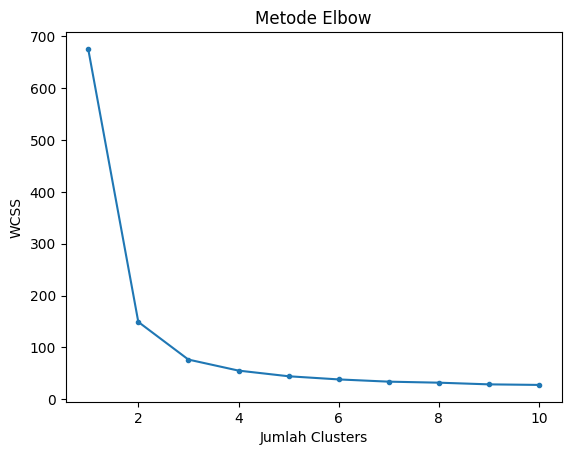

In [19]:
# Implementasi Metode Elbow dengan Penanganan Cluster Kosong
def elbow_method(X, max_clusters=10):
    wcss = []
    for k in range(1, max_clusters + 1):
        centroids, clusters = k_means(X, k)
        # Hitung Within-Cluster Sum of Squares (WCSS), hanya untuk cluster yang tidak kosong
        wcss_value = 0
        for i, cluster in enumerate(clusters):
            if len(cluster) > 0:  # Pastikan cluster tidak kosong
                wcss_value += np.sum((np.array(cluster) - centroids[i]) ** 2)
        wcss.append(wcss_value)
    return wcss

# Misalnya kita memiliki data `X` yang sudah ada (misalnya X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values)
# Menggunakan Metode Elbow untuk menentukan jumlah cluster yang optimal
wcss = elbow_method(X)
plt.plot(range(1, len(wcss) + 1), wcss, marker='.')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
# Menjalankan K-Means untuk k=3
k = 3  # Jumlah cluster berdasarkan metode elbow
centroids, clusters = k_means(X, k)

# Menampilkan centroid hasil K-Means
print("Centroids:", centroids)

Converged at iteration 6
Centroids: [[5.9016129  2.7653871  4.39354839 1.43387097]
 [5.006      3.34724    1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


### Visualisasi Hasil K-Means

Kode ini digunakan untuk memvisualisasikan hasil clustering yang dihasilkan dari algoritma K-Means pada dataset dua fitur. Fitur yang digunakan dalam visualisasi ini adalah Petal Length (Panjang Petal) dan Petal Width (Lebar Petal). Setiap cluster yang terbentuk akan ditampilkan dengan warna yang berbeda, dan centroid dari setiap cluster akan ditandai dengan simbol bintang berwarna kuning.

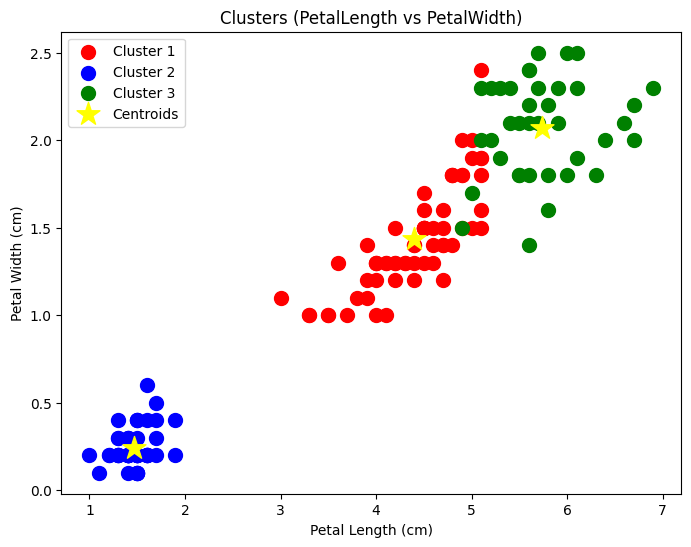

In [21]:
# Visualisasi Hasil Clustering
# Pilih 2 fitur untuk visualisasi 2D
plt.figure(figsize=(8, 6))

# Menampilkan setiap cluster dengan warna yang berbeda
colors = ['red', 'blue', 'green']  # Warna untuk setiap cluster
for cluster_idx, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 2], cluster[:, 3], s=100, c=colors[cluster_idx], label=f'Cluster {cluster_idx + 1}')

# Menampilkan centroid
plt.scatter(
    centroids[:, 2], centroids[:, 3],
    s=300, c='yellow', marker='*', label='Centroids'
)
plt.title('Clusters (PetalLength vs PetalWidth)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

## Evaluasi untuk mencari Silhouette Score dan Inertia..

In [22]:
def silhouette_score_manual(X, labels, k):
    silhouette_scores = []
    for i, point in enumerate(X):
        
        cluster_idx = labels[i]

        # Pisahkan data menjadi dalam cluster yang sama (A) dan cluster berbeda (B)
        same_cluster = X[labels == cluster_idx]
        other_clusters = [X[labels == idx] for idx in range(k) if idx != cluster_idx]

        # Hitung rata-rata jarak ke poin lain dalam cluster yang sama (A)
        if len(same_cluster) > 1:
            a = np.mean([euclidean_distance(point, other) for other in same_cluster if not np.array_equal(point, other)])
        else:
            a = 0

        # Hitung rata-rata jarak ke semua cluster lain (B)
        b = np.min([
            np.mean([euclidean_distance(point, other) for other in cluster])
            for cluster in other_clusters if len(cluster) > 0
        ])

        # Hitung Silhouette Score untuk poin ini
        silhouette = (b - a) / max(a, b) if max(a, b) > 0 else 0
        silhouette_scores.append(silhouette)
    
    # Rata-rata Silhouette Score untuk semua poin
    return np.mean(silhouette_scores)


# Buat array cluster labels untuk evaluasi
labels = np.zeros(X.shape[0], dtype=int)
for cluster_idx, cluster in enumerate(clusters):
    for point in cluster:
        idx = np.where((X == point).all(axis=1))[0][0]  # Cari indeks data asli
        labels[idx] = cluster_idx  # Tetapkan label cluster

k = 3  # Jumlah cluster yang digunakan
silhouette_avg_manual = silhouette_score_manual(X, labels, k)
print(f"Silhouette Score (manual): {silhouette_avg_manual:.4f}")

Silhouette Score (manual): 0.5193


In [24]:
# Fungsi untuk menghitung inertia
def calculate_inertia(X, centroids, clusters):
    inertia = 0
    for cluster_idx, cluster in enumerate(clusters):
        if len(cluster) > 0:
            cluster = np.array(cluster)
            # Hitung WCSS untuk setiap cluster
            inertia += np.sum((cluster - centroids[cluster_idx]) ** 2)
    return inertia

# Hitung inertia dari hasil clustering
inertia = calculate_inertia(X, centroids, clusters)
print(f"Inertia: {inertia:.4f}")

Inertia: 76.5624
